In [3]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [4]:
# getting a dataset
# setup training data

train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None


)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None

)



100%|██████████| 26.4M/26.4M [00:01<00:00, 14.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.92MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.1MB/s]


In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
image, label=train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
print(f"Image shape:{image.shape}")
print(f"Image label:{class_names[label]}")



Image shape:torch.Size([1, 28, 28])
Image label:Ankle boot


In [10]:
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

image shape:torch.Size([1, 28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

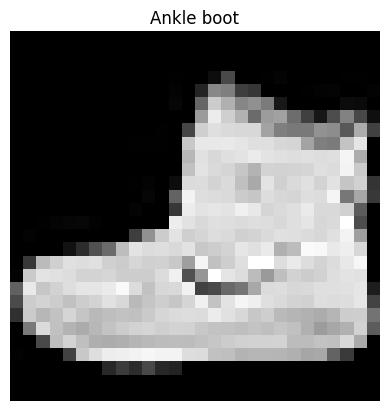

In [11]:
#Visualizng the data
import matplotlib.pyplot as plt
image, label=train_data[0]
print(f"image shape:{image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)


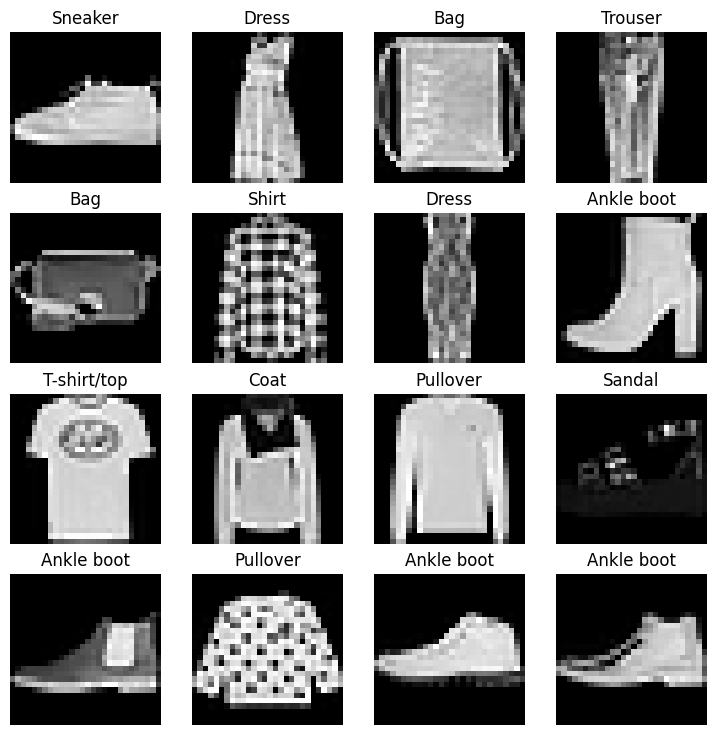

In [12]:
#torch.manual_seed(42)

fig=plt.figure(figsize=(9,9))

rows=4
col=4
for i in range(1, rows*col+1):
  random_idx=torch.randint(0, len(train_data), size=[1]).item()
  image, label=train_data[random_idx]
  fig.add_subplot(rows, col, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)




In [13]:
from torch.utils.data import DataLoader

torch.manual_seed(42)

BATCH_SIZE=32

train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True
                            )

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

train_dataloader, test_dataloader




(<torch.utils.data.dataloader.DataLoader at 0x7d56ba7cc690>,
 <torch.utils.data.dataloader.DataLoader at 0x7d5789ae3a50>)

In [14]:
len(train_dataloader), len(test_dataloader), BATCH_SIZE

(1875, 313, 32)

In [15]:
train_feature_batch, train_label_batch=next(iter(train_dataloader))
train_feature_batch.shape, train_label_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image shape:torch.Size([1, 28, 28])
label shape:torch.Size([])
Label:2


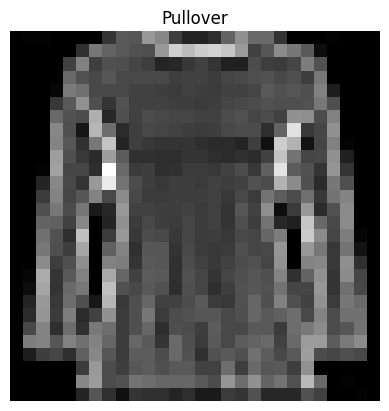

In [16]:
#torch.manual_seed(42)

random_idx=torch.randint(0, len(train_feature_batch), size=[1]).item()

img, label= train_feature_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

print(f"image shape:{img.shape}")
print(f"label shape:{label.shape}")
print(f"Label:{label}")


In [17]:
flatten_model=nn.Flatten()
x=train_feature_batch[0]
output=flatten_model(x)

print(f"shape before flattening:{x.shape}")
print(f"shape after flattening:{output.shape}")


shape before flattening:torch.Size([1, 28, 28])
shape after flattening:torch.Size([1, 784])


In [18]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

  def forward(self, x):

    return self.layer_stack(x)

In [20]:
torch.manual_seed(42)
model_0=FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [22]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")

else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


In [23]:
# importing the acuuracy_fn function from helper_functions
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [24]:
# recording the time it took for the code to run

from timeit import default_timer as timer
def print_train_time(start: float,
                      end: float,
                      device: torch.device=None):

  total_time=end-start
  print(f"train time on {device}: {total_time:3f} seconds")
  return total_time


In [25]:
start_time=timer()
end_time=timer()

print_train_time(start=start_time, end=end_time, device="cpu")

train time on cpu: 0.000052 seconds


5.196299991894193e-05

In [26]:
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu=timer()

epochs=3
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n------")

  train_loss=0
  for batch, (x,y) in enumerate(train_dataloader):
    model_0.train()

    y_pred=model_0(x)

    loss=loss_fn(y_pred, y)

    train_loss+=loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch%400==0:
      print(f"looking at batch {batch*len(x)}/{len(train_dataloader.dataset)} samples.")

  train_loss/=len(train_dataloader)

  test_loss, test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for x_test, y_test in test_dataloader:
      test_pred=model_0(x_test)
      test_loss+=loss_fn(test_pred, y_test)
      test_acc+=accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)

  print(f"train loss:{train_loss:4f} | test_loss:{test_loss:4f} | test_acc:{test_acc:4f}")

  train_time_end_on_cpu=timer()
  total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
------
looking at batch 0/60000 samples.
looking at batch 12800/60000 samples.
looking at batch 25600/60000 samples.
looking at batch 38400/60000 samples.
looking at batch 51200/60000 samples.
train loss:0.590389 | test_loss:0.509535 | test_acc:82.038738
train time on cpu: 9.800876 seconds
epoch: 1
------
looking at batch 0/60000 samples.
looking at batch 12800/60000 samples.
looking at batch 25600/60000 samples.
looking at batch 38400/60000 samples.
looking at batch 51200/60000 samples.
train loss:0.476332 | test_loss:0.479890 | test_acc:83.196885
train time on cpu: 19.452636 seconds
epoch: 2
------
looking at batch 0/60000 samples.
looking at batch 12800/60000 samples.
looking at batch 25600/60000 samples.
looking at batch 38400/60000 samples.
looking at batch 51200/60000 samples.
train loss:0.455033 | test_loss:0.476639 | test_acc:83.426518
train time on cpu: 29.232960 seconds


In [27]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):



  loss, acc=0, 0
  model.eval()
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      y_pred=model(x)

      loss+=loss_fn(y_pred, y)
      accuracy=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
      acc+=accuracy

    # Corrected calculation of average loss and accuracy
    loss/=len(data_loader)
    acc/=len(data_loader)


  return {"model_name": model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}

model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [28]:
# prompt: do not integrate it (egnostic code) with the code above rather write it separately in the cells below

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cpu


In [29]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):

    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),

        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()


    )


  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [30]:
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

In [31]:
# setup loss, optimizer, and evaluation metrices

from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [32]:
## Functionizing training  and evaluation/testing loops
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [33]:
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device):

  test_loss, test_acc=0, 0

  model.eval()
  with torch.inference_mode():
    for x, y in data_loader:
      x, y=x.to(device), y.to(device)

      test_pred=model(x)

      loss=loss_fn(test_pred, y)
      test_loss+=loss
      test_acc+=accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))


    test_loss/=len(data_loader)
    test_acc/=len(data_loader)

    print(f"Test loss:{test_loss:.5f} | Test acc:{test_acc:.2f}%\n")

In [34]:
torch.manual_seed(42)

from timeit import default_timer as timer # Corrected import
train_time_start_on_cpu=timer()

epochs=3


for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-------------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(
      model=model_1,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device)


train_time_end_on_cpu=timer()

total_train_time_model_1=print_train_time(start=train_time_start_on_cpu, # Corrected function call
                               end=train_time_end_on_cpu,
                               device=str(next(model_1.parameters()).device)

                               )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss:0.95636 | Test acc:65.00%

Epoch:1
-------------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss:0.72227 | Test acc:73.91%

Epoch:2
-------------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss:0.68500 | Test acc:75.02%

train time on cpu: 30.455516 seconds


In [35]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [36]:
total_train_time_model_0

29.23295985099992

In [37]:
total_train_time_model_1

30.455516442999965

In [38]:
model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [39]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [40]:
# Convolution Neural Network (CNN)

class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )

    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x=self.conv_block_1(x)
    #print(f"output shape of conv_block_1:{x.shape}")
    x=self.conv_block_2(x)
    #print(f"output shape of conv_block_2:{x.shape}")
    x=self.classifier(x)
    #print(f"output shape of classifier:{x.shape}")

    return x






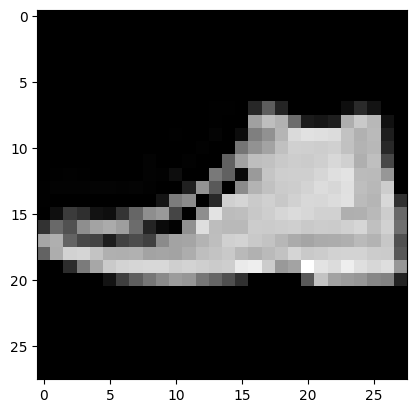

In [41]:
plt.imshow(image.squeeze(), cmap="gray")

In [42]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

In [43]:
rand_image_tensor=torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [44]:
# pass image through the model
model_2(rand_image_tensor.unsqueeze(dim=0).to(device))


tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [45]:
## Setup loss function and optimizer for model_2
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [46]:
## Training and Testing loop

torch.manual_seed(42)

from timeit import default_timer as Timer

train_time_start_model_2=timer()

epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epochs:{epochs}\n------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device
            )

train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                          end=train_time_end_model_2, device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epochs:3
------
Train loss: 0.59518 | Train accuracy: 78.38%
Test loss:0.39500 | Test acc:85.99%

Epochs:3
------
Train loss: 0.36536 | Train accuracy: 86.90%
Test loss:0.35244 | Test acc:86.91%

Epochs:3
------
Train loss: 0.32588 | Train accuracy: 88.13%
Test loss:0.32719 | Test acc:88.07%

train time on cpu: 157.148999 seconds


In [47]:
# get model_2 results
model_2_results=eval_model(model=model_2,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [48]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,
                             model_1_results,
                             model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [49]:
3# Add training time to results comparison

compare_results["Training time"]=[total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2,
                                  ]

compare_results

,model_name,model_loss,model_acc,Training time
0,FashionMNISTModelV0,0.476639,83.426518,29.232960
1,FashionMNISTModelV1,0.685001,75.019968,30.455516
2,FashionMNISTModelV2,0.327190,88.069089,157.148999


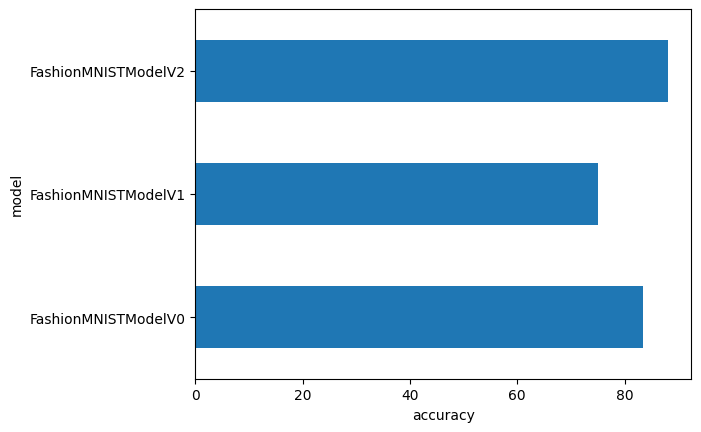

In [50]:
## visualize the model
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy")
plt.ylabel("model");


In [81]:
# Make and Evaluate random predictions with best model.

def make_predictions(model: torch.nn.Module,
                     data:list,
                     device: torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample, dim=0).to(device)
      pred_logits=model(sample)
      pred_prob=torch.softmax(pred_logits.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)





In [82]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [83]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape



torch.Size([1, 28, 28])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

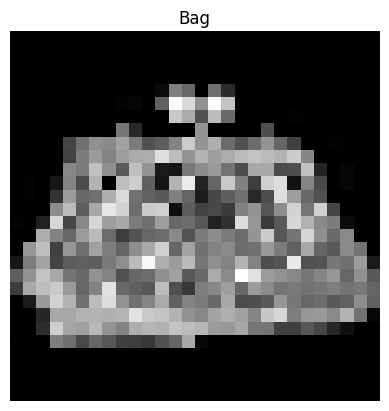

In [84]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [85]:
# make predictions
pred_probs=make_predictions(model=model_2,
                            data=test_samples)

pred_probs[:1]

tensor([[5.7894e-03, 8.5590e-04, 6.0321e-03, 2.4681e-03, 5.6834e-02, 2.3597e-02,
         6.1158e-01, 4.7192e-04, 2.8928e-01, 3.0866e-03]])

In [86]:
test_labels

[8, 3, 7, 8, 2, 8, 0, 0, 1]

In [87]:
# convert prediction probabilities to label

pred_classes=torch.argmax(pred_probs, dim=1)
pred_classes

tensor([6, 3, 7, 6, 6, 8, 0, 0, 1])

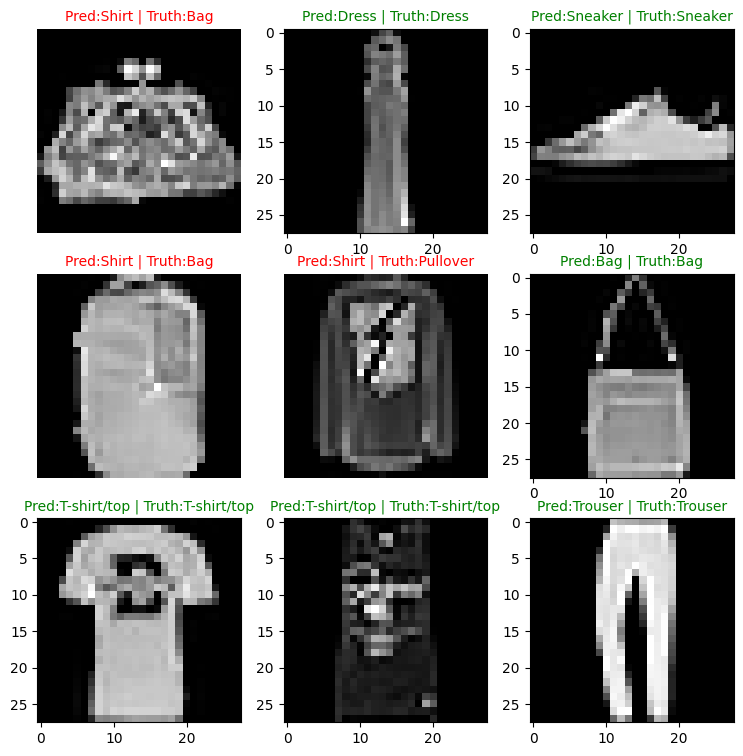

In [88]:
# plot predictions

plt.figure(figsize=(9,9,))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label=class_names[pred_classes[i]]
  truth_label=class_names[test_labels[i]]
  title_text=f"Pred:{pred_label} | Truth:{truth_label}"
  if pred_label==truth_label:
    plt.title(title_text, fontsize=10, color="green")

  else:
    plt.title(title_text, fontsize=10, color="red")

    plt.axis(False)




In [59]:
import mlxtend
mlxtend.__version__

'0.23.4'

In [72]:
3# Making predictions with the trained model
from tqdm.auto import tqdm

y_preds=[]
model_2.eval()
with torch.inference_mode():
  for x, y in tqdm(test_dataloader, desc="Making Predictions..."):
    x, y=x.to(device), y.to(device)

    y_logits=model_2(x)
    y_pred=torch.softmax(y_logits, dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
#print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor

Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [71]:
len(y_pred_tensor)


10000

In [78]:
try:
  import torchmetrics, mlxtend
  print(f"torchmetrics version:{torchmetrics.__version__}")
  print(f"mlxtend version:{mlxtend.__version__}")

except:

  !pip install torchmetrics mlxtend -q







torchmetrics version:1.7.4
mlxtend version:0.23.4


In [99]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


# Setup confusion matrix instance and compare predictions to targets
confmat=ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor=confmat(preds=y_pred_tensor, target=test_data.targets)

confmat_tensor

tensor([[628,   5,  44,  79,  12,   1, 224,   0,   7,   0],
        [  8, 895,   7,  68,  13,   0,   5,   0,   3,   1],
        [  7,   1, 810,  13,  95,   0,  69,   0,   5,   0],
        [ 25,  13,  25, 861,  36,   0,  34,   0,   4,   2],
        [  5,   6, 117,  50, 712,   0, 106,   0,   4,   0],
        [  6,   0,   9,  11,   0, 840,   4,  44,  66,  20],
        [ 69,   7, 123,  64,  98,   0, 626,   0,  13,   0],
        [  1,   1,   0,   1,   0,  33,   0, 877,  18,  69],
        [  8,   2,  23,  17,   6,   7,  29,   7, 900,   1],
        [  1,   0,   1,   2,   0,  20,   4,  71,  11, 890]])

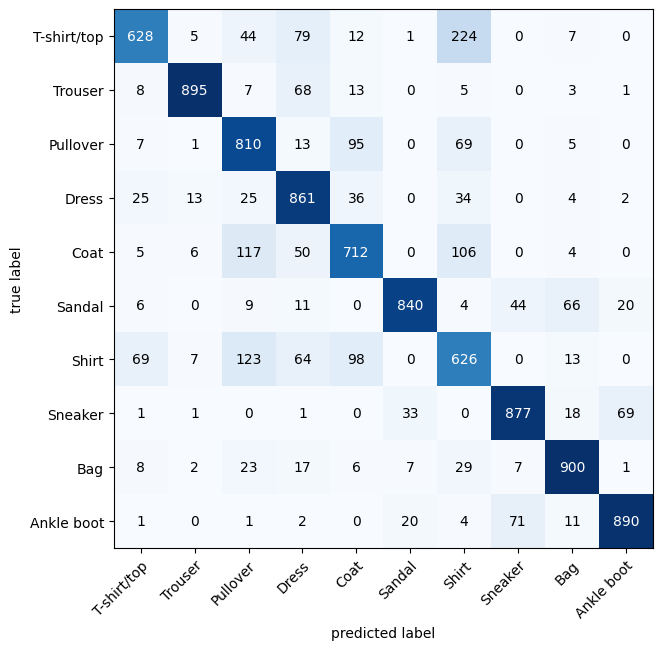

In [100]:
#plot the confusion matrix

fig, ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
                              )

In [102]:
# Save and load best performing model

from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME="03_pytorch_computer_vision_model_2.path"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

print(f"saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)





saving model to:models/03_pytorch_computer_vision_model_2.path


In [103]:
# create a new instance

torch.manual_seed(42)

loaded_model_2=FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_names))

# Load in the save state_dict()

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [104]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [105]:

3 # Evaluate the loaded model

torch.manual_seed(42)
loaded_model_2_results=eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [108]:
# check if model results are close to each other

torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)

In [62]:
## Stepping through nnConv2d

torch.manual_seed(42)

images=torch.randn(size=(32,3,64,64))
test_image=images[0]

print(f"Image batch shape:{images.shape}")
print(f"Single image shape:{test_image.shape}")
print(f"Test image:\n{test_image}")





Image batch shape:torch.Size([32, 3, 64, 64])
Single image shape:torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.79

In [63]:
## Calculating for a single convolutional neural network layer

conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=0)

conv_output=conv_layer(test_image.unsqueeze(dim=0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [64]:
## stepping through nn.MaxPool2d
print(f"test image original shape:{test_image.shape}")
print(f"test image with unsqueezed dimension:{test_image.unsqueeze(0).shape}")

max_pool_layer=nn.MaxPool2d(kernel_size=2)

test_image_through_conv=conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after going through conv_layer():{test_image_through_conv.shape}")

test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print(f"shape after going through conv_layer() and max_pool_layer():{test_image_through_conv_and_max_pool.shape}")

test image original shape:torch.Size([3, 64, 64])
test image with unsqueezed dimension:torch.Size([1, 3, 64, 64])
shape after going through conv_layer():torch.Size([1, 10, 62, 62])
shape after going through conv_layer() and max_pool_layer():torch.Size([1, 10, 31, 31])


In [65]:
torch.manual_seed(42)

random_tensor=torch.randn(size=(1,1,2,2))
print(f"\nrandom tensor:\n{random_tensor}")
print(f"random tensor shape:{random_tensor.shape}")

max_pool_layer=nn.MaxPool2d(kernel_size=2)
max_pool_layer=max_pool_layer(random_tensor)

print(f"max pool layer:\n{max_pool_layer}")
print(f"max pool layer shape:{max_pool_layer.shape}")



random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
random tensor shape:torch.Size([1, 1, 2, 2])
max pool layer:
tensor([[[[0.3367]]]])
max pool layer shape:torch.Size([1, 1, 1, 1])


In [66]:
image.shape

torch.Size([1, 28, 28])

In [67]:
!pip install torchmetrics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 833.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.3 MB/s eta 0:00:00
